<a href="https://colab.research.google.com/github/mardmikon/-Intelligent-systems-and-technologies/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5%207-8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание 7-8**

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
import seaborn as sns

data_headers = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive",
                "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font",
                "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data",
                "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project",
                "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest","capital_run_length_total"]
data = pd.read_csv('spambase.data', names=data_headers)

_standartScaller = StandardScaler()
data_x = data.iloc[:,1:-1]
data_x = _standartScaller.fit_transform(data_x)
data_y = data.iloc[:,-1:]

_smote = SMOTE()
data_x, data_y = _smote.fit_resample(data_x, data_y)

x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:-1],
                                                    data.iloc[:,-1],
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    stratify=data.iloc[:,-1],
                                                    random_state=200)

x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(data_x,
                                                                    data_y,
                                                                    test_size=0.3,
                                                                    shuffle=True,
                                                                    stratify=data_y,
                                                                    random_state=200)

# **SVM-классификатор**

**Перед балансировкой**

In [51]:
_SVM = SVC()
timeSVMStart= time.time()
_SVM.fit(x_train, y_train)
timeSVMStop = time.time()
timeSVM = timeSVMStop-timeSVMStart
y_train_pred = _SVM.predict(x_train)
y_test_pred = _SVM.predict(x_test)

Обучающая выборка

In [52]:
svmAccuracyTrain = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}, " 
      f"Recall: {recall_score(y_train, y_train_pred, average='weighted')}, " 
      f"Precision: {f1_score(y_train, y_train_pred, average='weighted')}")

Accuracy: 0.7027950310559006, Recall: 0.7027950310559006, Precision: 0.6853993997376457


Тестовая выборка

In [53]:
svmAccuracyTest = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}, "
      f"Recall: {recall_score(y_test, y_test_pred, average='weighted')}, "
      f"Precision: {f1_score(y_test, y_test_pred, average='weighted')}")

Accuracy: 0.7038377986965967, Recall: 0.7038377986965967, Precision: 0.6845056647079052


**После балансировки**

In [54]:
_SVM.fit(x_train_res, y_train_res)
y_train_res_pred = _SVM.predict(x_train_res)
y_test_res_pred = _SVM.predict(x_test_res)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Обучающая выборка

In [55]:
svmAccuracyTrainRes = accuracy_score(y_train_res, y_train_res_pred)
print(f"Accuracy: {accuracy_score(y_train_res, y_train_res_pred)}, " 
      f"Recall: {recall_score(y_train_res, y_train_res_pred, average='weighted')}, " 
      f"Precision: {f1_score(y_train_res, y_train_res_pred, average='weighted')}")

Accuracy: 0.943376889572124, Recall: 0.943376889572124, Precision: 0.9433681457839532


Тестовая выборка

In [56]:
svmAccuracyTestRes = accuracy_score(y_test_res, y_test_res_pred)
print(f"Accuracy: {accuracy_score(y_test_res, y_test_res_pred)}, " 
      f"Recall: {recall_score(y_test_res, y_test_res_pred, average='weighted')}, " 
      f"Precision: {f1_score(y_test_res, y_test_res_pred, average='weighted')}")

Accuracy: 0.9390316796174537, Recall: 0.9390316796174537, Precision: 0.9390206554714726


**Сравнение**

<BarContainer object of 4 artists>

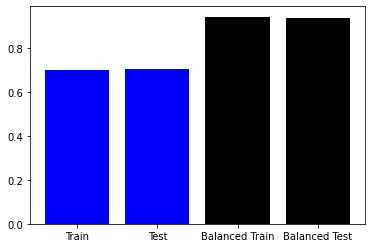

In [57]:
compare_data = [svmAccuracyTrain, svmAccuracyTest, svmAccuracyTrainRes, svmAccuracyTestRes]
axis = ['Train', 'Test', 'Balanced Train', 'Balanced Test']
plt.bar(axis, compare_data, color=['blue', 'blue', 'black', 'black'])

# **KNN-классификатор**

**Перед балансировкой**

In [58]:
_KNN = KNeighborsClassifier()
timeKNNStart= time.time()
_KNN.fit(x_train, y_train)
timeKNNStop = time.time()
timeKNN = timeKNNStop-timeKNNStart
y_train_pred = _KNN.predict(x_train)
y_test_pred = _KNN.predict(x_test)

Обучающая выборка

In [59]:
knnAccuracyTrain = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}, " 
      f"Recall: {recall_score(y_train, y_train_pred, average='weighted')}, " 
      f"Precision: {f1_score(y_train, y_train_pred, average='weighted')}")

Accuracy: 0.8649068322981367, Recall: 0.8649068322981367, Precision: 0.8648975140328501


Тестовая выборка

In [60]:
knnAccuracyTest = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}, "
      f"Recall: {recall_score(y_test, y_test_pred, average='weighted')}, "
      f"Precision: {f1_score(y_test, y_test_pred, average='weighted')}")

Accuracy: 0.8102824040550326, Recall: 0.8102824040550326, Precision: 0.8097646725603139


**После балансировки**

In [61]:
_KNN.fit(x_train_res, y_train_res)
y_train_res_pred = _KNN.predict(x_train_res)
y_test_res_pred = _KNN.predict(x_test_res)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Обучающая выборка

In [62]:
knnAccuracyTrainRes = accuracy_score(y_train_res, y_train_res_pred)
print(f"Accuracy: {accuracy_score(y_train_res, y_train_res_pred)}, " 
      f"Recall: {recall_score(y_train_res, y_train_res_pred, average='weighted')}, " 
      f"Precision: {f1_score(y_train_res, y_train_res_pred, average='weighted')}")

Accuracy: 0.9438893159108378, Recall: 0.9438893159108378, Precision: 0.9438810049115174


Тестовая выборка

In [63]:
knnAccuracyTestRes = accuracy_score(y_test_res, y_test_res_pred)
print(f"Accuracy: {accuracy_score(y_test_res, y_test_res_pred)}, "
      f"Recall: {recall_score(y_test_res, y_test_res_pred, average='weighted')}, "
      f"Precision: {f1_score(y_test_res, y_test_res_pred, average='weighted')}")

Accuracy: 0.917513448894202, Recall: 0.917513448894202, Precision: 0.9174719927356728


**Сравнение**

<BarContainer object of 4 artists>

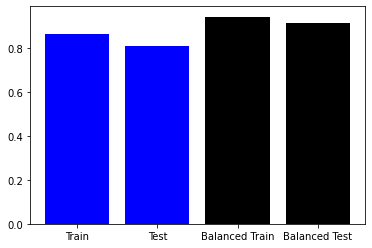

In [64]:
compare_data = [knnAccuracyTrain, knnAccuracyTest, knnAccuracyTrainRes, knnAccuracyTestRes]
axis = ['Train', 'Test', 'Balanced Train', 'Balanced Test']
plt.bar(axis, compare_data, color=['blue', 'blue', 'black', 'black'])

# **RF-классификатор**

**Перед балансировкой**

In [65]:
_RF = RandomForestClassifier()
timeRFStart= time.time()
_RF.fit(x_train, y_train)
timeRFStop = time.time()
timeRF = timeRFStop-timeRFStart
y_train_pred = _RF.predict(x_train)
y_test_pred = _RF.predict(x_test)

Обучающая выборка

In [66]:
rfAccuracyTrain = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}, " 
      f"Recall: {recall_score(y_train, y_train_pred, average='weighted')}, " 
      f"Precision: {f1_score(y_train, y_train_pred, average='weighted')}")

Accuracy: 0.9996894409937889, Recall: 0.9996894409937889, Precision: 0.9996894623464785


Тестовая выборка

In [67]:
rfAccuracyTest = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}, "
      f"Recall: {recall_score(y_test, y_test_pred, average='weighted')}, "
      f"Precision: {f1_score(y_test, y_test_pred, average='weighted')}")

Accuracy: 0.945691527878349, Recall: 0.945691527878349, Precision: 0.9454935200294909


**После балансировки**

In [68]:
_RF.fit(x_train_res, y_train_res)
y_train_res_pred = _RF.predict(x_train_res)
y_test_res_pred = _RF.predict(x_test_res)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Обучающая выборка

In [69]:
rfAccuracyTrainRes = accuracy_score(y_train_res, y_train_res_pred)
print(f"Accuracy: {accuracy_score(y_train_res, y_train_res_pred)}, " 
      f"Recall: {recall_score(y_train_res, y_train_res_pred, average='weighted')}, " 
      f"Precision: {f1_score(y_train_res, y_train_res_pred, average='weighted')}")

Accuracy: 0.9997437868306431, Recall: 0.9997437868306431, Precision: 0.9997437868306431


Тестовая выборка

In [70]:
rfAccuracyTestRes = accuracy_score(y_test_res, y_test_res_pred)
print(f"Accuracy: {accuracy_score(y_test_res, y_test_res_pred)}, "
      f"Recall: {recall_score(y_test_res, y_test_res_pred, average='weighted')}, "
      f"Precision: {f1_score(y_test_res, y_test_res_pred, average='weighted')}")

Accuracy: 0.9611476389719068, Recall: 0.9611476389719068, Precision: 0.9611463896235212


**Сравнение**

<BarContainer object of 4 artists>

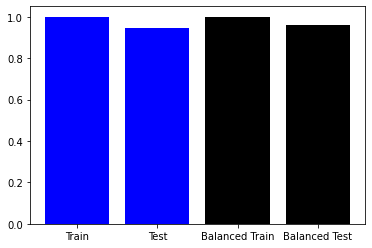

In [71]:
compare_data = [rfAccuracyTrain, rfAccuracyTest, rfAccuracyTrainRes, rfAccuracyTestRes]
axis = ['Train', 'Test', 'Balanced Train', 'Balanced Test']
plt.bar(axis, compare_data, color=['blue', 'blue', 'black', 'black'])

# **Визуализация**

**Перед балансировкой**

In [112]:
tsne = TSNE(init='random', perplexity=10).fit_transform(data.iloc[:,1:-1])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'Data T-SNE projection')]

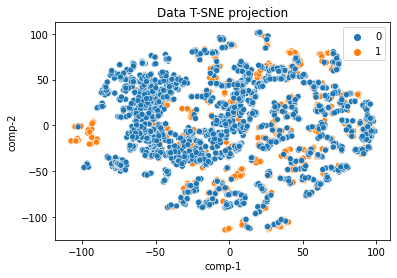

In [113]:
df = pd.DataFrame()
df["y"] = data.iloc[:,-1]
df["comp-1"] = tsne[:,0]
df["comp-2"] = tsne[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                data=df).set(title="Data T-SNE projection") 

**После балансировки**

In [114]:
tsne_res = TSNE(init='random', perplexity=10).fit_transform(data_x)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[Text(0.5, 1.0, 'Data T-SNE projection')]

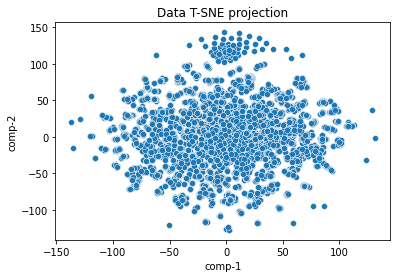

In [142]:
df_res = pd.DataFrame()
df_res['y'] = data_y.all
df_res["comp-1"] = tsne_res[:,0]
df_res["comp-2"] = tsne_res[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df_res.y.tolist(),
                data=df_res).set(title="Data T-SNE projection") 

# **Сравнение классификаторов**

**По времени**

Elapsed time in seconds
SVM: 0.6407647132873535
KNN: 0.007927179336547852
RF: 0.5955111980438232


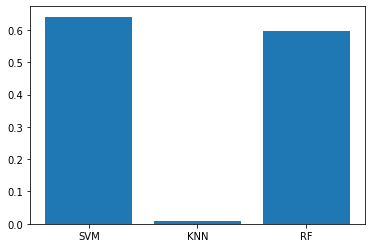

In [81]:
timeData = [timeSVM, timeKNN, timeRF]
axis = ['SVM', 'KNN', 'RF']
plt.bar(axis, timeData)
print(f"Elapsed time in seconds\nSVM: {timeSVM}\nKNN: {timeKNN}\nRF: {timeRF}")

**По точности**

Обучающая выборка перед балансировкой


Train accuracy
SVM: 0.7027950310559006
KNN: 0.8649068322981367
RF: 0.9996894409937889


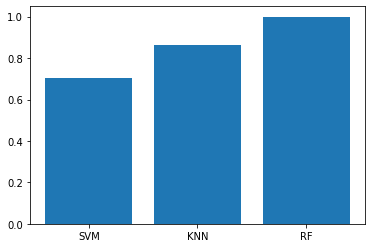

In [82]:
accuracyDataTrain = [svmAccuracyTrain, knnAccuracyTrain, rfAccuracyTrain]
axis = ['SVM', 'KNN', 'RF']
plt.bar(axis, accuracyDataTrain)
print(f"Train accuracy\nSVM: {svmAccuracyTrain}\nKNN: {knnAccuracyTrain}\nRF: {rfAccuracyTrain}")

Тестовая выборка перед балансировкой

Test accuracy
SVM: 0.7038377986965967
KNN: 0.8102824040550326
RF: 0.945691527878349


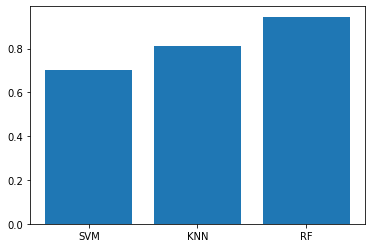

In [83]:
accuracyDataTest = [svmAccuracyTest, knnAccuracyTest, rfAccuracyTest]
axis = ['SVM', 'KNN', 'RF']
plt.bar(axis, accuracyDataTest)
print(f"Test accuracy\nSVM: {svmAccuracyTest}\nKNN: {knnAccuracyTest}\nRF: {rfAccuracyTest}")

Обучающая выборка после балансировки

Train accuracy
SVM: 0.943376889572124
KNN: 0.9438893159108378
RF: 0.9997437868306431


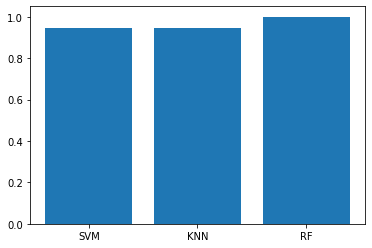

In [86]:
accuracyDataTrainRes = [svmAccuracyTrainRes, knnAccuracyTrainRes, rfAccuracyTrainRes]
axis = ['SVM', 'KNN', 'RF']
plt.bar(axis, accuracyDataTrainRes)
print(f"Train accuracy\nSVM: {svmAccuracyTrainRes}\nKNN: {knnAccuracyTrainRes}\nRF: {rfAccuracyTrainRes}")

Тестовая выборка после балансировки

Test accuracy
SVM: 0.9390316796174537
KNN: 0.917513448894202
RF: 0.9611476389719068


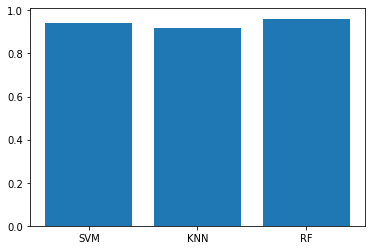

In [87]:
accuracyDataTestRes = [svmAccuracyTestRes, knnAccuracyTestRes, rfAccuracyTestRes]
axis = ['SVM', 'KNN', 'RF']
plt.bar(axis, accuracyDataTestRes)
print(f"Test accuracy\nSVM: {svmAccuracyTestRes}\nKNN: {knnAccuracyTestRes}\nRF: {rfAccuracyTestRes}")

# **ИТОГ:** лучший классификатор по времени - KNN, по точности - RF